In [2]:
# we will implement shap
# we will use the same dataset as before
# we will use the same model as before
# we will use the same preprocessing as before

import pandas as pd
import numpy as np
import pickle
import shap

# load the model from disk
scaler = pickle.load(open('../Preprocessing/all_scaler.pkl', 'rb'))
model_gbc_rain = pickle.load(open('../Models/best_rain.pkl', 'rb'))
model_gbc_fog = pickle.load(open('../Models/best_fog.pkl', 'rb'))
logmodel_thunderstorm = pickle.load(open('../Models/best_thunderstorm.pkl', 'rb'))

# load the dataset
df = pd.read_csv('../Data/austin_weather.csv')

In [19]:
shap.initjs()


In [5]:
%run ../Preprocessing/Preprocessing.py

In [6]:
X,y,scaler = preprocess_for_prediction(df)

In [7]:
X = scaler.transform(X)

In [11]:
X = pd.DataFrame(X, columns=df.columns[:-3])

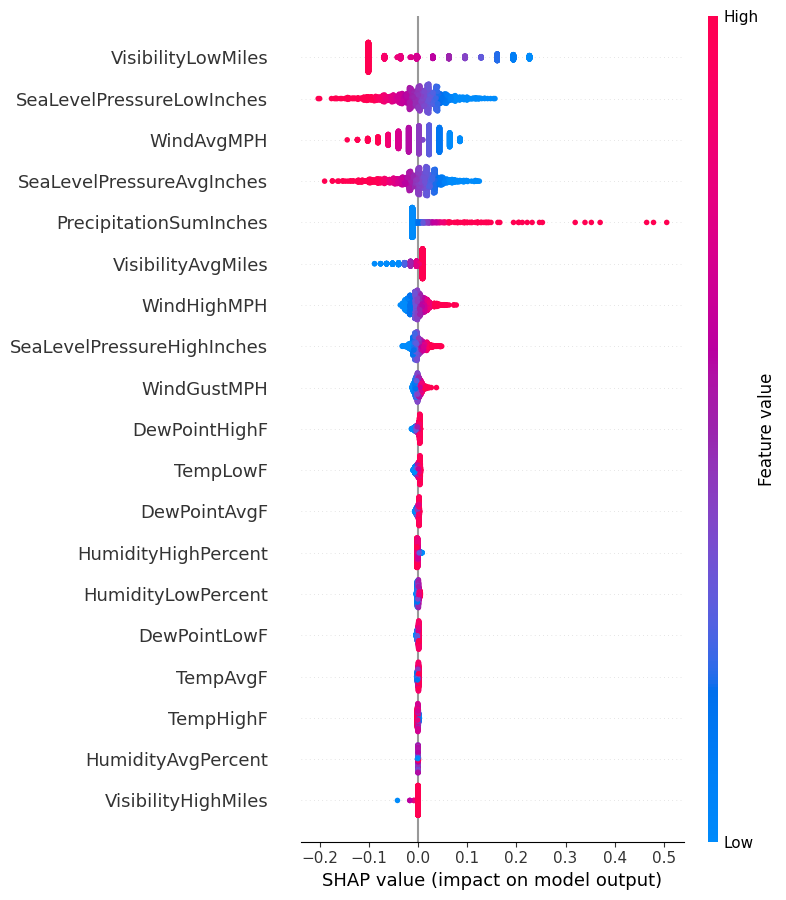

In [92]:
explainer_rain = shap.LinearExplainer(logmodel_thunderstorm, X)
shap_values_rain = explainer_rain.shap_values(X)
shap.summary_plot(shap_values_rain, X, plot_type="dot")